# Example solution for INF200, Deliverable 4

This notebook provides an implementation of a SIR model with a vaccination component.

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

## Model implementation

### Dynamics function

In [2]:
def sir_dynamics(y, t, beta, gamma, phi, T_v):
    """
    Compute right-hand side of ODE for model.
    
    y     - state vector [S, I, R] at time t
    t     - time [days]
    beta  - infection parameter
    gamma - recovery parameter
    phi   - vaccination parameter
    T_v   - vaccination only for t > T_v
    """
    
    S, I, R = y
    N = S + I + R
    dSdt = - beta * I * S / N - phi * S * (t > T_v)
    dIdt = beta*I*S / N - gamma * I
    dRdt = gamma * I + phi * S * (t > T_v)
    
    return np.array([dSdt, dIdt, dRdt])

### Function running model

In [4]:
def sir_model(t_max, N, I_0, beta, gamma, phi=0, T_v=0):
    """
    Simulate SIR model with given parameters.
    
    t_max  - upper time limit [days]
    N      - population size
    I_0    - number of infected at t = 0
    
    Returns (t, res), where columns of res are S, I, R.
    """
    
    t = np.arange(0, t_max+0.5)
    res = scipy.integrate.odeint(sir_dynamics, [N-I_0, I_0, 0], t, 
                                 args=(beta, gamma, phi, T_v))
    return t, res

In [5]:
def sir_model_and_plot(t_max, N, I_0, beta, gamma, phi=0, T_v=0):
    """
    Simulate SIR model and plot.
    
    See sir_model() for documentation of parameters.
    """
    
    plt.plot(*sir_model(t_max, N, I_0, beta, gamma, phi, T_v));
    plt.legend(['S', 'I', 'R']);
    plt.xlabel('Time [days]');
    plt.ylabel('Number of people');
    plt.title(rf'Dynamics for $\beta={beta}$, $\phi={phi}$ and $T_v={T_v}$');

### Test run

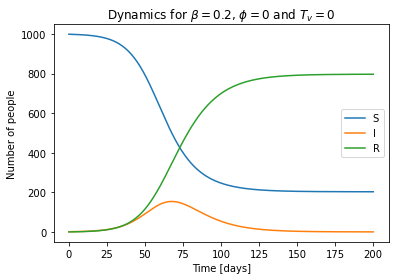

In [6]:
sir_model_and_plot(200, 1000, 1, 0.2, 0.1);

### Exploration without vaccination

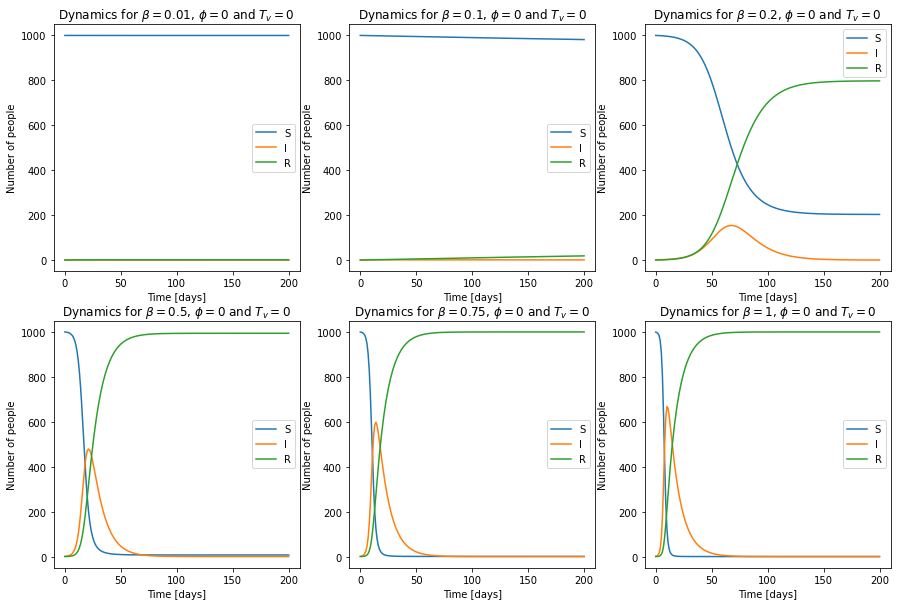

In [21]:
plt.figure(figsize=(15, 10))
for ix, beta in enumerate([0.01, 0.1, 0.2, 0.5, 0.75, 1]):
    plt.subplot(2, 3, ix+1)
    sir_model_and_plot(200, 1000, 1, beta, 0.1);

### Model with vaccination

#### Different vaccination rates

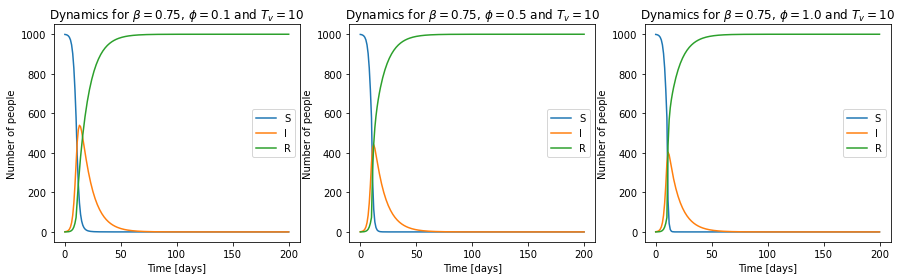

In [22]:
plt.figure(figsize=(15, 4))
for ix, phi in enumerate([0.1, 0.5, 1.]):
    plt.subplot(1, 3, ix+1)
    sir_model_and_plot(200, 1000, 1, 0.75, 0.1, phi=phi, T_v=10);

#### Different vaccination start times

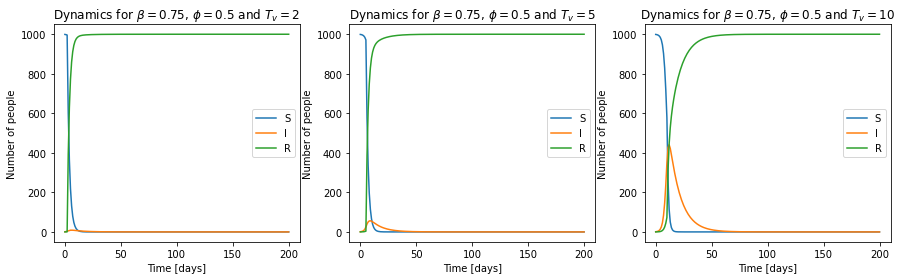

In [23]:
plt.figure(figsize=(15, 4))
for ix, T_v in enumerate([2, 5, 10]):
    plt.subplot(1, 3, ix+1)
    sir_model_and_plot(200, 1000, 1, 0.75, 0.1, phi=0.5, T_v=T_v);

### Maximum number of infectious as function of beta and phi

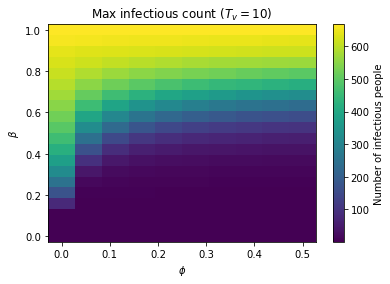

In [24]:
beta = np.linspace(0, 1, num=20)
phi = np.linspace(0, 0.5, num=10)
Imax = np.zeros((len(beta), len(phi)))
for bix, b in enumerate(beta):
    for pix, p in enumerate(phi):
        _, r = sir_model(200, 1000, 1, b, 0.1, p, 10)
        Imax[bix, pix] = r[:, 1].max()
plt.pcolormesh(phi, beta, Imax, shading='nearest');
plt.xlabel(r'$\phi$');
plt.ylabel(r'$\beta$');
plt.title(rf'Max infectious count ($T_v=10$)');
cb = plt.colorbar();
cb.ax.set_ylabel('Number of infectious people');